# Introduction

Illnesses such as stress, poor sleep quality and sleep duration are important aspects that affect an individual's mental and physical health. In the modern era, work demands and fast-paced lifestyles often lead to increased levels of stress, sleep disturbances and various health problems. This is experienced by those who work in high-pressure environments and irregular routines, leading to prolonged sleep disturbances and adverse health effects. Therefore, it is important to explore the relationship between stress levels, sleep quality, and sleep duration with daily activities, such as work, physical activity levels, and living habits.

Research is needed to explore the relationship between stress levels, sleep quality, and sleep duration with daily activities such as work, physical activity levels, and other life habits. A better understanding of how these factors are interrelated is essential for formulating effective and applicable interventions to improve individuals' quality of life, particularly in the context of stress management and physical fitness.

In addition, current machine learning and data science technologies allow us to explore patterns in complex, multivariate data. K-Means clustering and Principal Component Analysis (PCA) are methods that can assist in grouping individuals based on stress, sleep, and activity patterns, making it easier to create targeted intervention programs for each group.

Using this analytical approach, this study aims to:

1. Identify groups of individuals with different stress and sleep patterns.
2. Analyze the main factors that influence stress levels and sleep quality.
3. Provide recommendations for interventions that can be implemented for each group, based on the analyzed data.
4. Through this research, it is hoped that the results obtained can serve as a foundation for organizations and individuals in creating better health programs, preventing the risk of long-term health problems, and improving quality of life with a data-driven approach.

### Dataset Overview:

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features in Dataset

1. Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns
2. Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
3. Cardiovascular Health: Examine blood pressure and heart rate measurements.
4. Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns:

1.  PersonID: An identifier for each individual.
2.  Gender: The gender of the person (Male/Female).
3.  Age: The age of the person in years.
4.  Occupation: Occupation or profession of person
5.  Sleep Duration (hours): The number of hours the person sleeps per day.
6.  Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7.  Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8.  Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9.  BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Details About Sleep Disorder Columns

1.  None: The individual does not exhibit any specific sleep disorder.
2.  Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
3.  Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing 
from sklearn.cluster import KMeans

data_file = 'data.csv'

df = pd.read_csv(data_file)

# Basic summary of the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
        Person ID

In [2]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


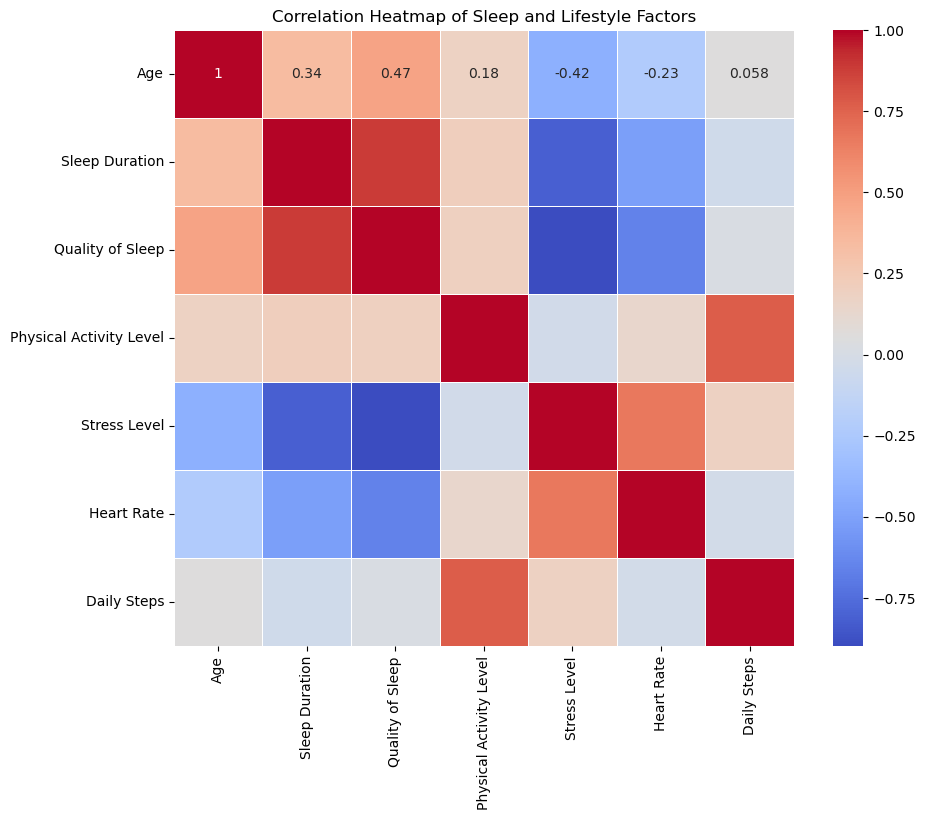

In [3]:
# Subset of columns for correlation analysis
selected_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps']

# Generate correlation matrix
corr_matrix = df[selected_columns].corr()

# Custom heatmap with aesthetic changes
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Sleep and Lifestyle Factors')
plt.show()

# Stratifying by Age Group and Gender

### Gender Distribution

   Gender  Count
0    Male    189
1  Female    185


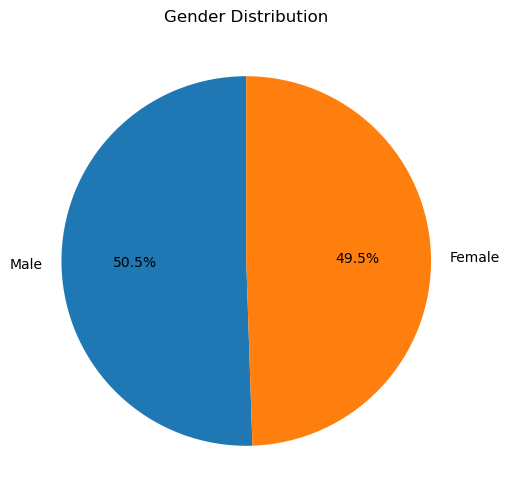

In [4]:
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']  

# Mengecek struktur gender_count
print(gender_count.head()) 

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.1f%%', startangle=90)


plt.title('Gender Distribution')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


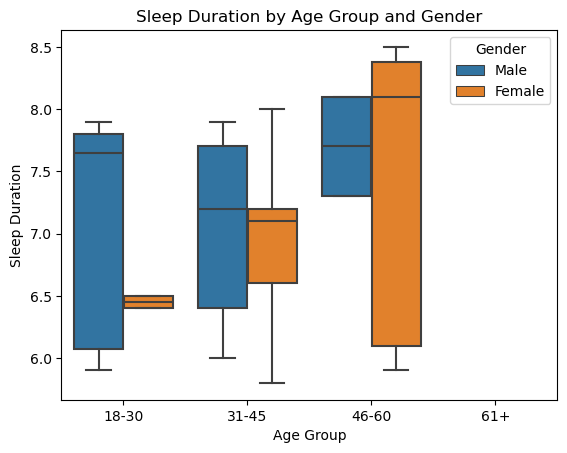

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


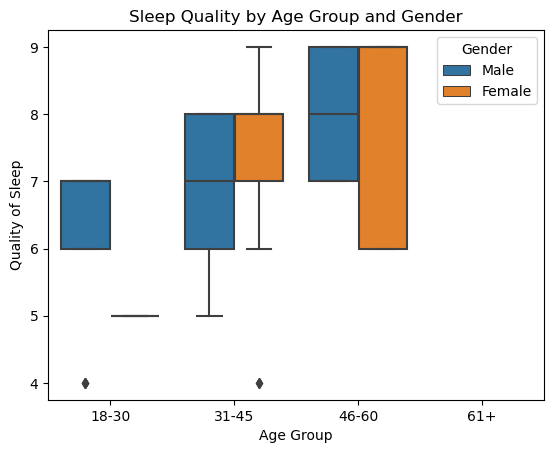

In [5]:
bins = [18, 30, 45, 60, 80]
labels = ['18-30', '31-45', '46-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Sleep duration by Age Group and Gender
sns.boxplot(x='Age Group', y='Sleep Duration', hue='Gender', data=df)
plt.title('Sleep Duration by Age Group and Gender')
plt.show()

# Sleep quality by Age Group and Gender
sns.boxplot(x='Age Group', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Sleep Quality by Age Group and Gender')
plt.show()

### Conclusion: 
Women tend to have less sleep duration than men at younger ages (18-45 years), which affects their sleep quality. However, at older ages (46-60 years), women have longer sleep duration. At the age of 31-45 years, few women sleep more than 7 hours, leading to a decrease in sleep quality.

### Implication: 
This suggests that shorter sleep duration in younger women (18-45 years) may negatively impact their sleep quality, which is likely to continue into older age. This decline in sleep quality appears to be a common pattern among women, and also applies to men as they age, indicating a trend of declining sleep health in old age.

### Recommendation: 
Efforts to improve sleep quality in women, especially those aged 18-45 years, should focus on educating them on the importance of maintaining adequate sleep duration. Health intervention programs can be developed to address sleep problems that arise in this age group, as well as promote better sleep habits for both men and women to prevent sleep deterioration with age.



# Sleep Duration effect on Quality of Sleep

In [6]:
df['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [7]:
correlation = df[['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Physical Activity Level']].corr()
print(correlation['Sleep Duration'])

Age                        0.344709
Sleep Duration             1.000000
Stress Level              -0.811023
Heart Rate                -0.516455
Daily Steps               -0.039533
Physical Activity Level    0.212360
Name: Sleep Duration, dtype: float64


<Axes: xlabel='Sleep Duration'>

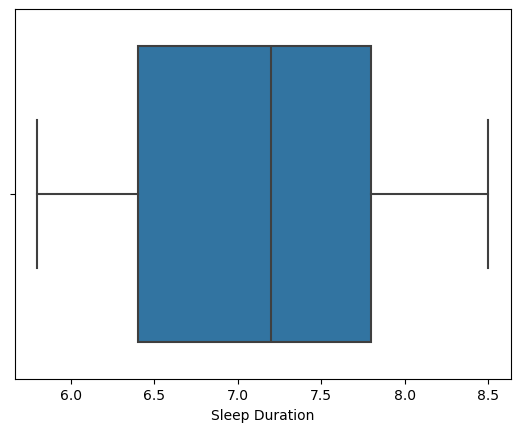

In [8]:
sns.boxplot(x=df['Sleep Duration'])

<Axes: xlabel='Sleep Duration', ylabel='Physical Activity Level'>

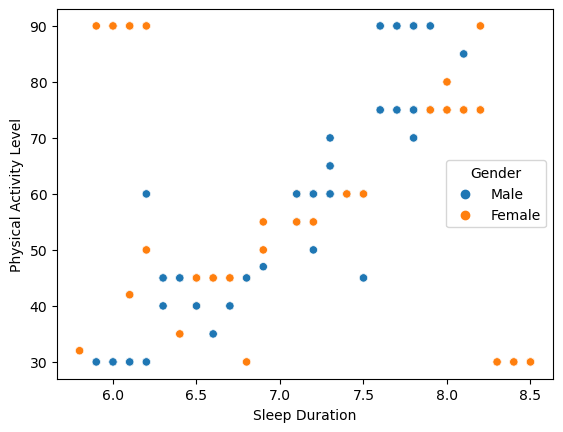

In [9]:
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', hue='Gender', data=df)

<Axes: xlabel='Sleep Duration', ylabel='Age'>

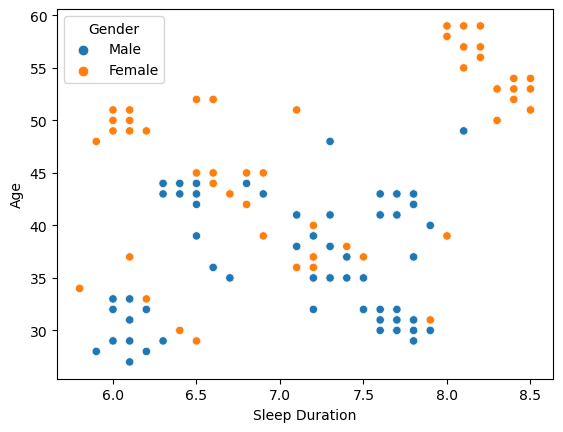

In [10]:
sns.scatterplot(x='Sleep Duration', y='Age', hue='Gender' ,data=df)

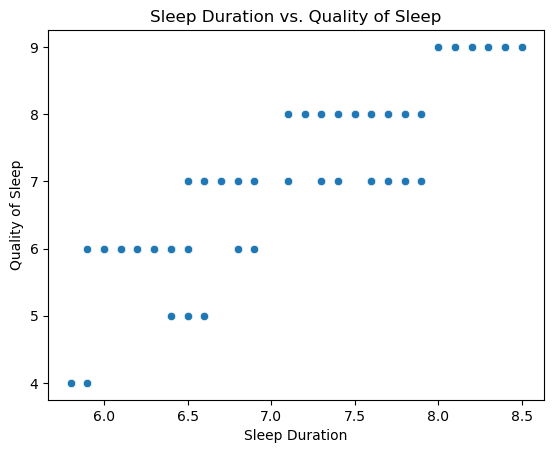

                  Sleep Duration  Quality of Sleep
Sleep Duration          1.000000          0.883213
Quality of Sleep        0.883213          1.000000


In [11]:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

# Calculate correlation
correlation = df[['Sleep Duration', 'Quality of Sleep']].corr()
print(correlation)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

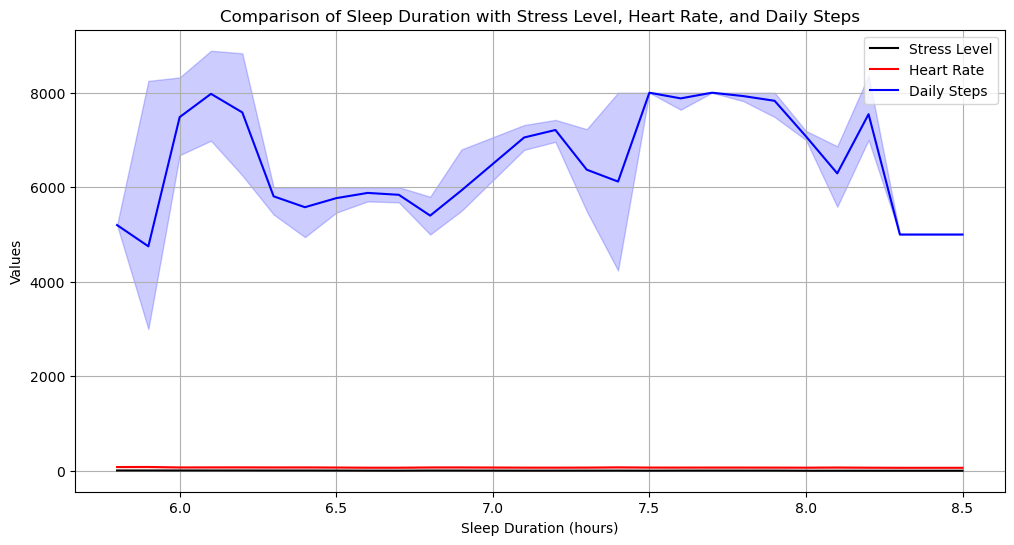

In [12]:
plt.figure(figsize=(12, 6))

# Menggunakan parameter color untuk menentukan warna
sns.lineplot(data=df, x='Sleep Duration', y='Stress Level', label='Stress Level', color='black')
sns.lineplot(data=df, x='Sleep Duration', y='Heart Rate', label='Heart Rate', color='red')
sns.lineplot(data=df, x='Sleep Duration', y='Daily Steps', label='Daily Steps', color='blue')

plt.title('Comparison of Sleep Duration with Stress Level, Heart Rate, and Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


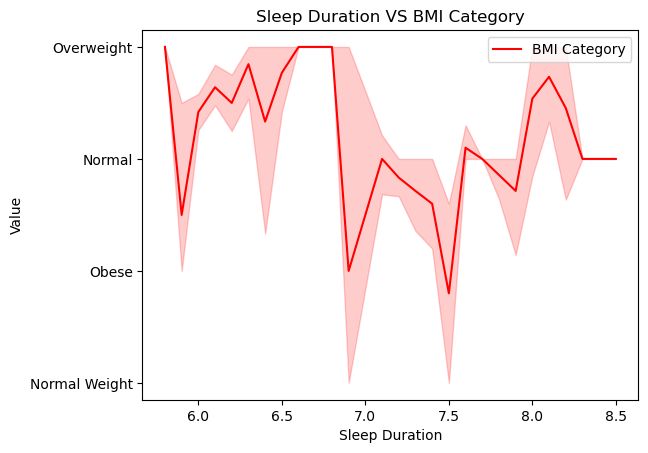

In [13]:
sns.lineplot(data=df, x='Sleep Duration', y='BMI Category', label='BMI Category', color='red')
plt.title('Sleep Duration VS BMI Category')
plt.xlabel('Sleep Duration')
plt.ylabel('Value')
plt.show()

### Conclusion: 
Based on the data, longer sleep duration has a positive correlation with sleep quality. The longer a person sleeps, the more likely they are to have good sleep quality.

### Implication: 
This suggests that maintaining adequate sleep duration is crucial to improving sleep quality. People who sleep longer are likely to experience better sleep quality, which in turn has the potential to improve overall well-being.

### Recommendation: 
To improve sleep quality, it is recommended that individuals maintain sufficient sleep duration each night. Health seminars or workshops can be conducted to sufficient the importance of adequate sleep duration and teach good sleep habits to produce good sleep quality.


# How Gender Influences Physical Activities
how gender influences activity levels across different age ranges and potentially highlight key insights, such as reduced activity in certain groups.

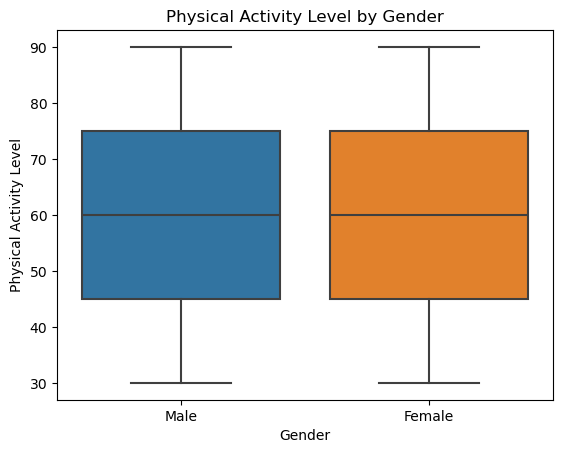

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


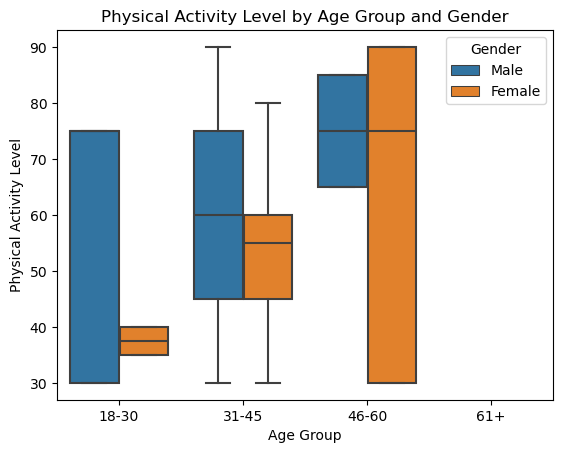

In [14]:
# Gender-specific analysis of physical activity level
sns.boxplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level by Gender')
plt.show()

# Physical activity by Age Group and Gender
sns.boxplot(x='Age Group', y='Physical Activity Level', hue='Gender', data=df)
plt.title('Physical Activity Level by Age Group and Gender')
plt.show()

### Conclusion: 
Based on the data, both men and women are affected by physical activity. However, men at a younger age (18-45 years) are more dominant in physical activity, while women are more dominant at an older age (46-60 years).

### Implication: 
This suggests differences in physical activity patterns based on age and gender. Younger men tend to be more physically active, while women begin to dominate physical activity at older ages. This may influence health needs and fitness strategies by age and gender.

### Recommendation: 
Fitness programs and health campaigns can be tailored based on age group and gender. For young men, further encouragement of sustained physical activity may be warranted, while for women aged 46-60, specific programs that support increased physical activity at this age to maintain optimal health may be warranted.


# Stress Level and Gender
This analysis may reveal if certain age groups or genders experience higher stress and whether this correlates with poor sleep or other health indicators.



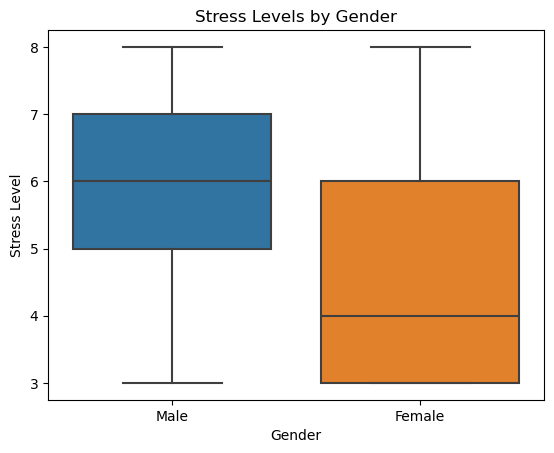

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


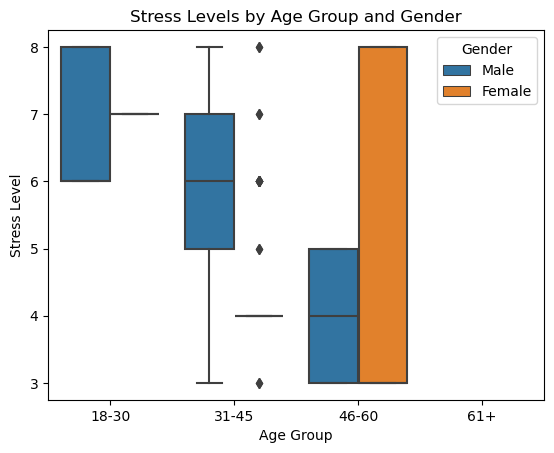

In [15]:
# Stress levels by gender
sns.boxplot(x='Gender', y='Stress Level', data=df)
plt.title('Stress Levels by Gender')
plt.show()

# Stress levels by Age Group and Gender
sns.boxplot(x='Age Group', y='Stress Level', hue='Gender', data=df)
plt.title('Stress Levels by Age Group and Gender')
plt.show()

### Conclusion: 
Men aged 18-30 years have relatively high stress levels, while at 31-45 years, their stress levels are more variable with some extreme cases. On the other hand, women aged 46-60 years had higher stress levels than men of the same age, whose stress levels were lower and more variable.

### Implication: 
This suggests that stress levels in men tend to be higher at a young age and vary as they enter middle age. However, at older ages (46-60 years), women are more prone to experiencing higher stress levels than men, which may be influenced by social, occupational or health factors. High stress in both groups can have a negative impact on physical and mental health.

### Recommendation: 
To address stress in young men (18-30 years) and older women (46-60 years), focused stress management programs are needed. For example, providing psychological support, counseling and relaxation practices such as meditation or yoga can help lower stress levels. In addition, workplace mental health programs can be specifically designed to reduce stress for men and women at these more vulnerable ages.


# Heart Rate and BMI Stratification by Gender and Age

## Heart Rate by Gender and Age

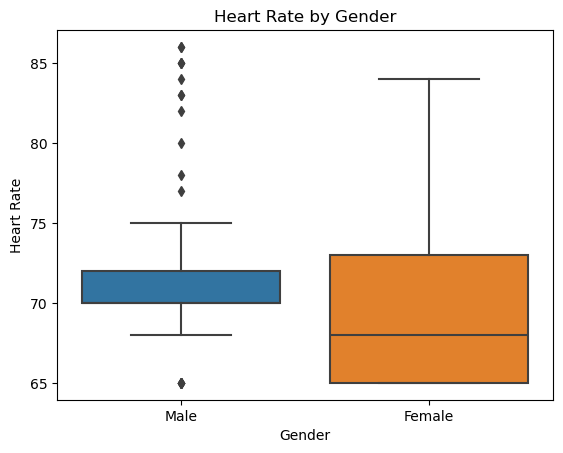

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


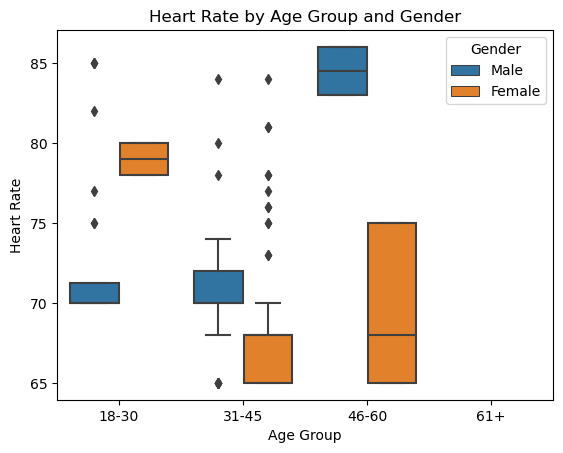

In [16]:
# Heart rate by Gender
sns.boxplot(x='Gender', y='Heart Rate', data=df)
plt.title('Heart Rate by Gender')
plt.show()

# Heart rate by Age Group and Gender
sns.boxplot(x='Age Group', y='Heart Rate', hue='Gender', data=df)
plt.title('Heart Rate by Age Group and Gender')
plt.show()

## BMI Category by Gender and Age
highlight trends in heart rate and BMI across gender and age groups, helping to uncover potential health risks.

In [17]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,18-30
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,18-30
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,18-30
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,18-30
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-60


  BMI Category  Count
0       Normal    216
1   Overweight    148
2        Obese     10


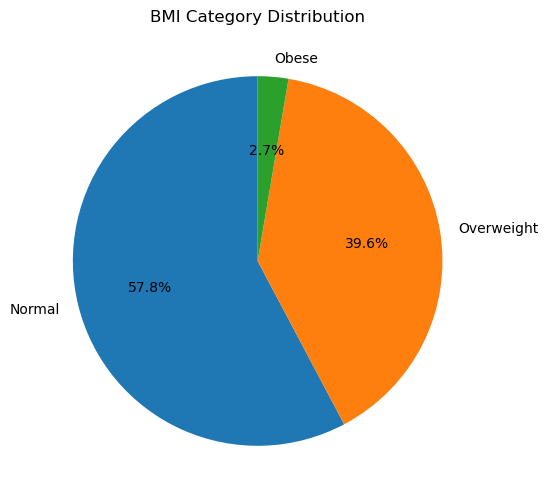

In [18]:
bmi_count = df['BMI Category'].value_counts().reset_index()
bmi_count.columns = ['BMI Category', 'Count']

print(bmi_count.head()) 

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(bmi_count['Count'], labels=bmi_count['BMI Category'], autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution')
plt.show()

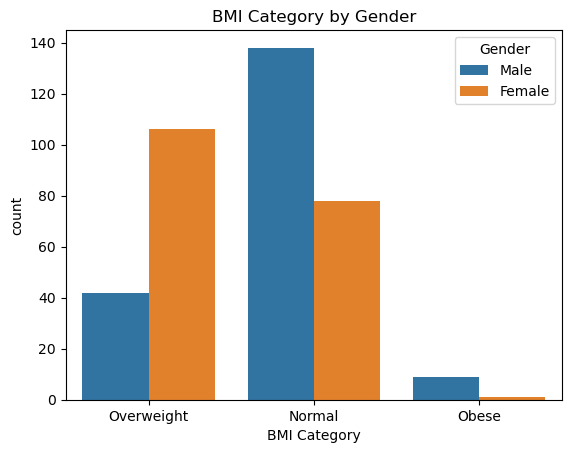

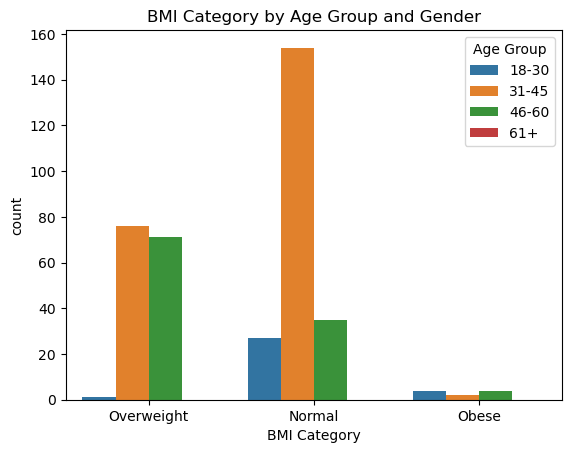

In [19]:
# BMI by Gender
sns.countplot(x='BMI Category', hue='Gender', data=df)
plt.title('BMI Category by Gender')
plt.show()

# BMI by Age Group and Gender
sns.countplot(x='BMI Category', hue='Age Group', data=df)
plt.title('BMI Category by Age Group and Gender')
plt.show()

## How BMI Category Affected Stress 

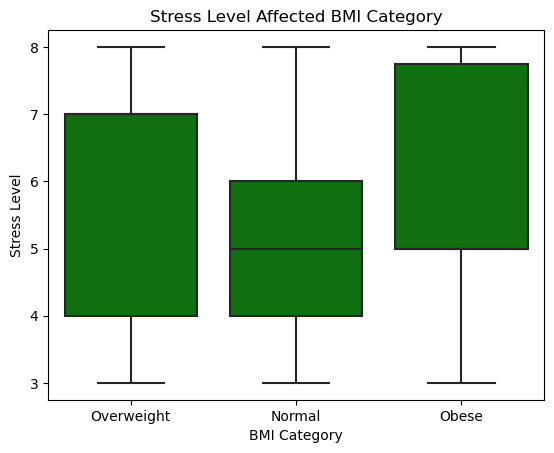

In [20]:
sns.boxplot(data=df, x='BMI Category', y='Stress Level', color='green')
plt.title('Stress Level Affected BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Stress Level')
plt.show()

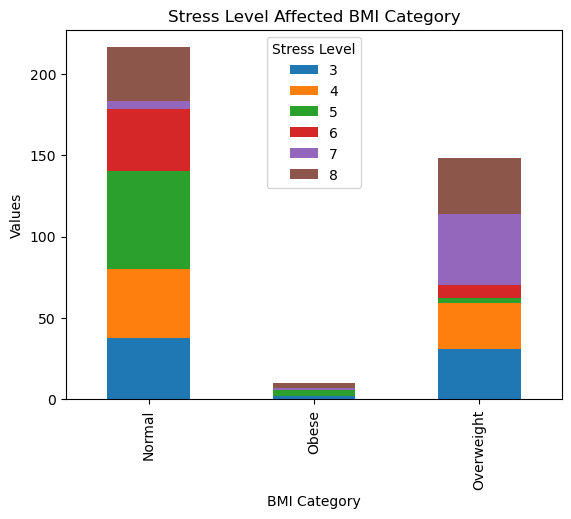

In [21]:
pd.crosstab(df['BMI Category'], df['Stress Level']).plot(kind='bar', stacked=True)
plt.title('Stress Level Affected BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Values')
plt.show()

# Exploring Sleep Disorders by Gender and Age
whether certain sleep disorders are more common in specific gender or age brackets.

  Sleep Disorder  Count
0    Sleep Apnea     78
1       Insomnia     77


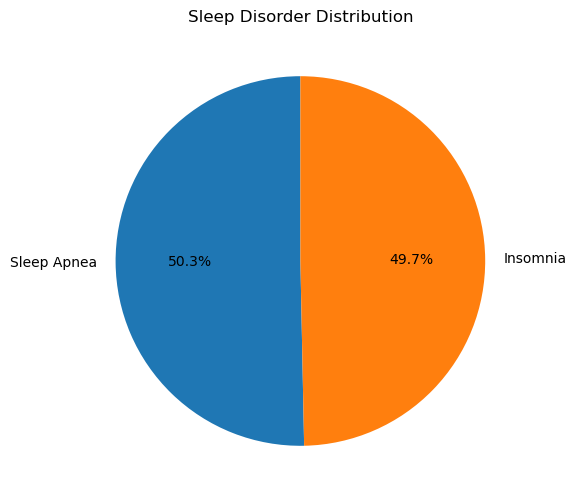

In [22]:
sd_count = df['Sleep Disorder'].value_counts().reset_index()
sd_count.columns = ['Sleep Disorder', 'Count']  
# Mengecek struktur gender_count
print(sd_count.head()) 

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sd_count['Count'], labels=sd_count['Sleep Disorder'], autopct='%1.1f%%', startangle=90)


plt.title('Sleep Disorder Distribution')
plt.show()


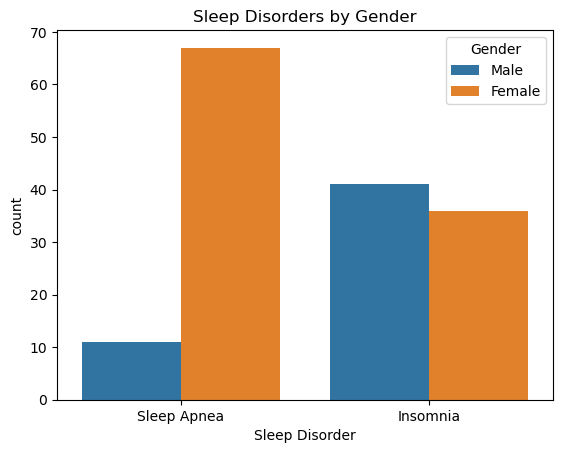

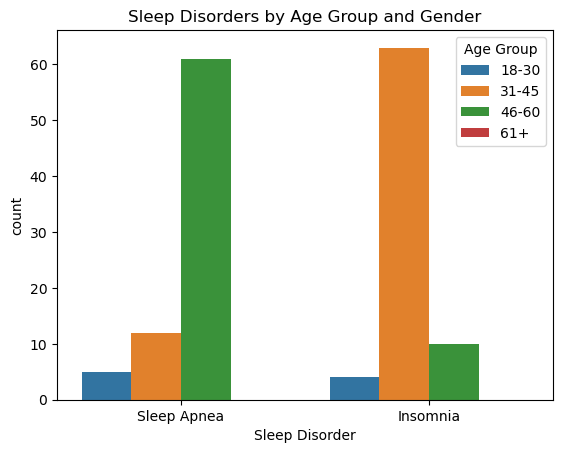

In [23]:
# Sleep disorders by Gender
sns.countplot(x='Sleep Disorder', hue='Gender', data=df)
plt.title('Sleep Disorders by Gender')
plt.show()

# Sleep disorders by Age Group and Gender
sns.countplot(x='Sleep Disorder', hue='Age Group', data=df)
plt.title('Sleep Disorders by Age Group and Gender')
plt.show()

### Conclusion: 
Sleep apnea is more common among individuals aged 46-60 years, while insomnia is more common among individuals aged 31-45 years.

### Implication: 
This suggests that age may be an important risk factor in the prevalence of certain sleep disorders. Older individuals (46-60 years old) may be more prone to sleep apnea, which could be due to age-related physiological factors. Meanwhile, younger individuals (31-45 years) are more likely to experience insomnia, possibly related to work stress, lifestyle, or psychological factors that are more common in that age group.

### Recommendation: 
To reduce the risk of sleep apnea in the 46-60 age group, wellness programs may include education on weight management and good breathing techniques during sleep. For individuals aged 31-45 who are more prone to insomnia, recommendations could include stress management, consistent sleep routines, and psychological support to help cope with work or life pressures.


## How Sleep Disorder Affected BMI Category

<Figure size 1600x600 with 0 Axes>

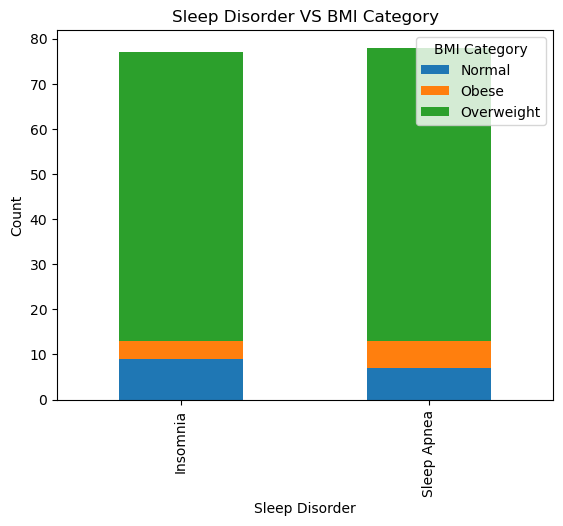

In [24]:
plt.figure(figsize=(16, 6))
pd.crosstab(df['Sleep Disorder'], df['BMI Category']).plot(kind='bar', stacked=True)
plt.title('Sleep Disorder VS BMI Category')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

# How Sleep Duration Affected Sleep Disorder

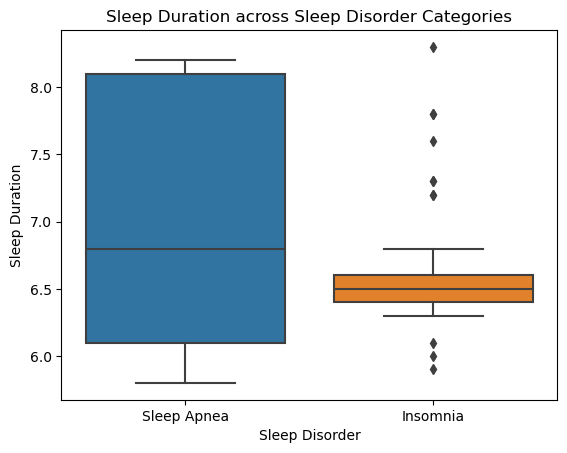

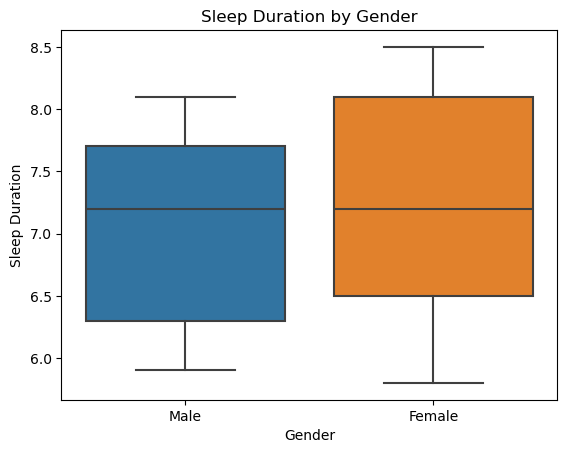

In [25]:
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration across Sleep Disorder Categories')
plt.show()

sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Gender')
plt.show()

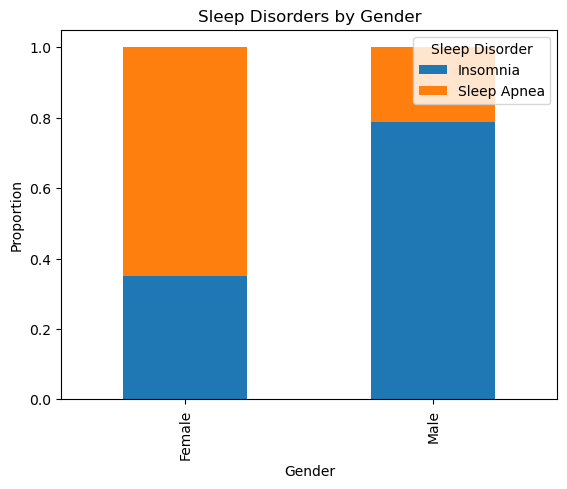

In [26]:
# Gender and Sleep Disorders Prevalence
gender_disorder = df.groupby('Gender')['Sleep Disorder'].value_counts(normalize=True).unstack()
gender_disorder.plot(kind='bar', stacked=True)
plt.title('Sleep Disorders by Gender')
plt.ylabel('Proportion')
plt.show()


### Conclusion: 
There are two main sleep disorders, sleep apnea and insomnia. Sleep apnea is more common in women, while insomnia is more common in men. Factors such as stress, poor sleep quality, and little sleep duration contribute to the occurrence of these sleep disorders.

### Implication: 
This suggests that sleep disorders are affected by gender differences and certain risk factors, such as stress and short sleep duration. Sleep apnea, which is more common in women, and insomnia, which is more common in men, may require different approaches to prevention and treatment. These sleep disorders can have a serious impact on quality of life and overall health, including the risk of physical and mental health disorders.

### Recommendation: 
To prevent and treat sleep disorders such as sleep apnea and insomnia, comprehensive health programs such as health content distribution, seminars, and government programs can be introduced. This may include stress management, improved sleep habits, and appropriate medical interventions. Education on the importance of good sleep quality also needs to be improved, especially for groups that are more susceptible to these disorders, namely men who are more at risk of insomnia and women who are more prone to sleep apnea.


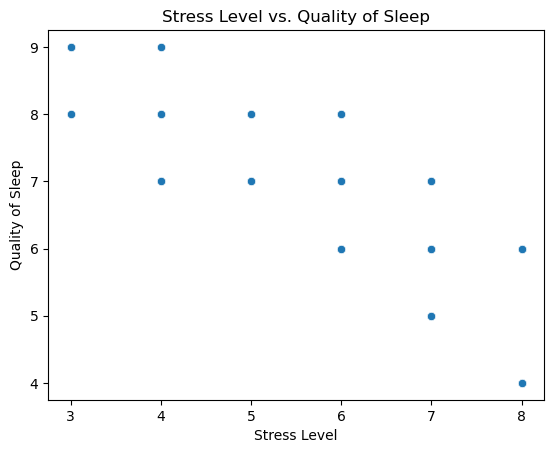

                  Stress Level  Quality of Sleep
Stress Level          1.000000         -0.898752
Quality of Sleep     -0.898752          1.000000


In [27]:
# Scatter plot for stress levels and sleep quality
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title('Stress Level vs. Quality of Sleep')
plt.show()

# Correlation between stress levels and sleep quality
correlation_stress_sleep = df[['Stress Level', 'Quality of Sleep']].corr()
print(correlation_stress_sleep)


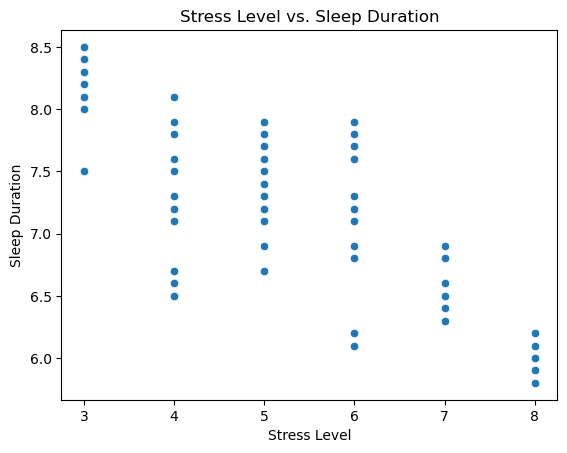

In [28]:
# Scatter plot for stress levels and sleep duration
sns.scatterplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Stress Level vs. Sleep Duration')
plt.show()

### Conclusion: 
Quality sleep and sufficient sleep duration can significantly reduce stress in an individual. Conversely, the shorter the sleep duration and the lower the sleep quality, the more susceptible a person becomes to experiencing high levels of stress.

### Implication: 
This suggests that inadequate sleep in terms of both duration and quality can worsen one's stress condition. Sleep deprivation not only impacts physical health but also worsens mental health, increasing the risk of excessive stress and various other psychological problems.

### Recommendation: 
It is recommended that individuals pay attention to good sleep habits by maintaining adequate sleep duration and ensuring optimal sleep quality. Mental health programs can emphasize the importance of quality sleep as one method of stress prevention. In addition, introducing relaxation techniques before bed and promoting a comfortable sleeping environment can help reduce the risk of stress due to poor sleep


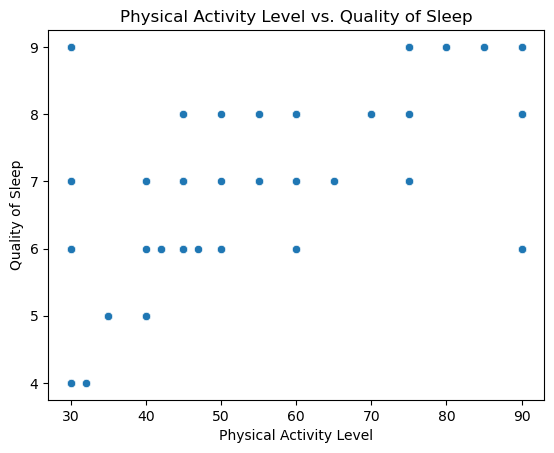

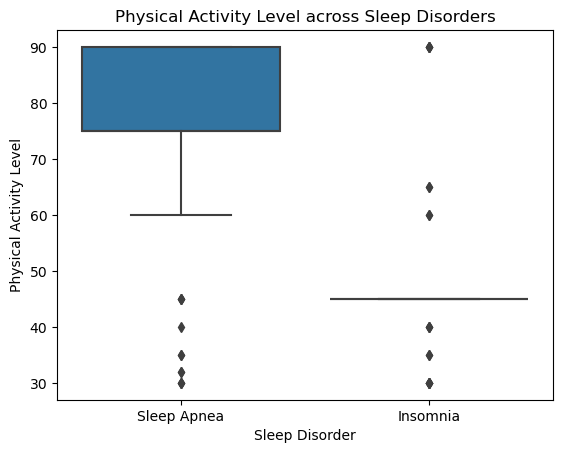

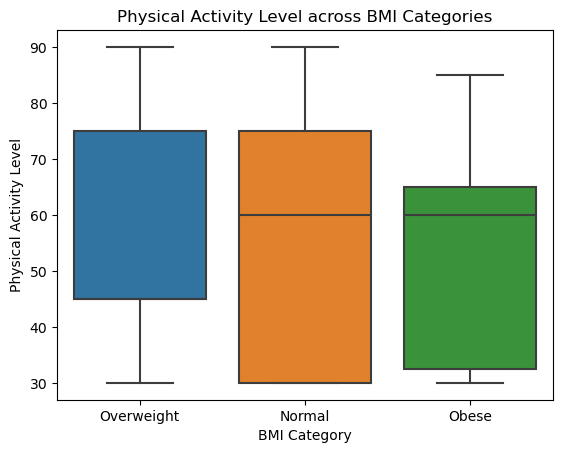

In [29]:
# Physical activity vs sleep quality
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Physical Activity Level vs. Quality of Sleep')
plt.show()

# Physical activity by sleep disorders
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level across Sleep Disorders')
plt.show()

# Boxplot of physical activity by BMI category
sns.boxplot(x='BMI Category', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level across BMI Categories')
plt.show()

### Conclusion: 
High physical activity can improve sleep quality because the energy used makes the body need better rest, thus reducing the risk of insomnia. In addition, the more physical activity, the lower the risk of developing obesity.

### Implication: 
This suggests that physical activity not only has a positive impact on sleep quality but also plays an important role in maintaining overall body health. Individuals who regularly exercise or engage in physical activity are more likely to have good sleep quality and a lower risk of obesity-related health problems.

### Recommendation: 
It is recommended that people, especially those at risk of insomnia or obesity, increase their daily physical activity, such as regular exercise or light activity throughout the day. Health programs that promote active lifestyles can help prevent sleep disorders and obesity, and improve overall quality of life.

### Tekanan sistolik mencerminkan kekuatan yang dihasilkan oleh jantung saat memompa darah ke seluruh tubuh, sedangkan tekanan darah diastolik (angka bawah) adalah tekanan dalam pembuluh darah saat jantung beristirahat.

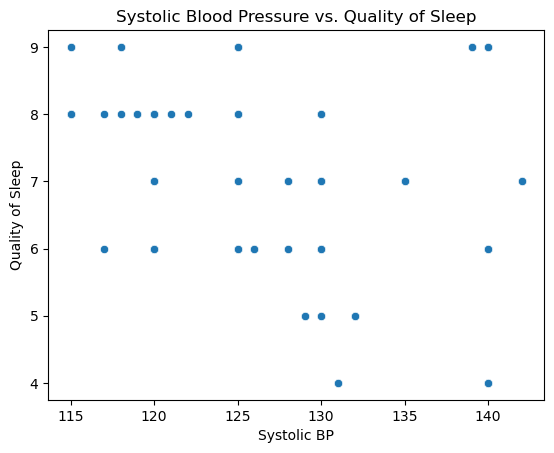

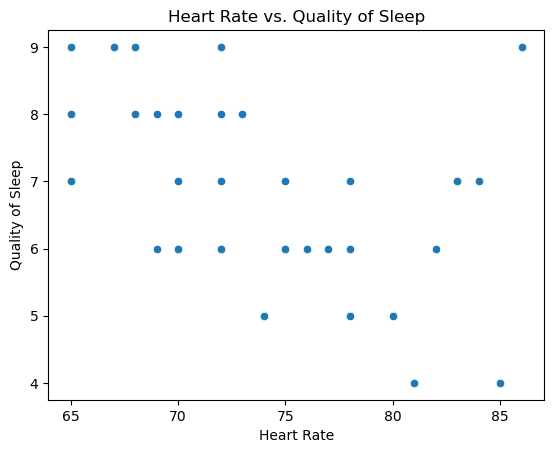

In [30]:
# Blood pressure and sleep quality analysis (assuming blood pressure is in "systolic/diastolic" format)
df['Systolic BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

sns.scatterplot(x='Systolic BP', y='Quality of Sleep', data=df)
plt.title('Systolic Blood Pressure vs. Quality of Sleep')
plt.show()

# Correlation between heart rate and sleep quality
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', data=df)
plt.title('Heart Rate vs. Quality of Sleep')
plt.show()


### Conclusion: 
There was no clear correlation between systolic blood pressure and sleep quality in the scatterplot. However, individuals with lower systolic blood pressure (115-120 mmHg) tend to have better sleep quality, while higher blood pressure (130-140 mmHg) tends to be associated with more variable sleep quality. In addition, heart rate also showed no clear correlation with sleep quality, but heart rates between 65-72 bpm and 85 bpm tended to be associated with better sleep quality.

### Implication: 
This suggests that while there is no direct relationship between blood pressure or heart rate and sleep quality, there are indications that blood pressure and heart rate within certain ranges may support better sleep quality. Individuals with blood pressure or heart rate outside these ranges may experience variations in sleep quality, which may affect overall sleep health.

### Recommendation: 
Further research is needed to explore the relationship between blood pressure, heart rate and sleep quality in more depth. Individuals who have higher systolic blood pressure or heart rates that are not within the optimal range may be given recommendations to monitor their condition more closely. Interventions such as blood pressure and heart rate management through diet, exercise, and stress management can help improve their sleep quality. 


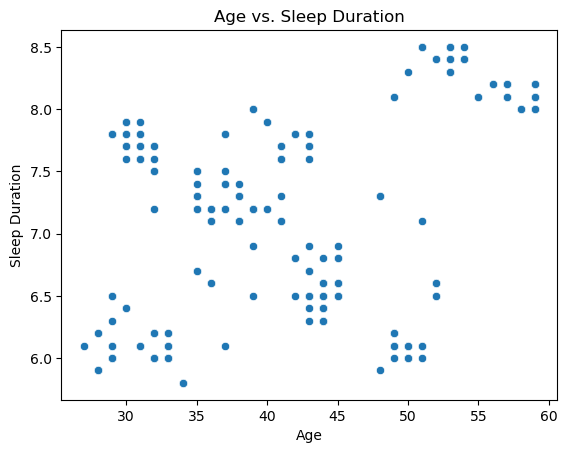

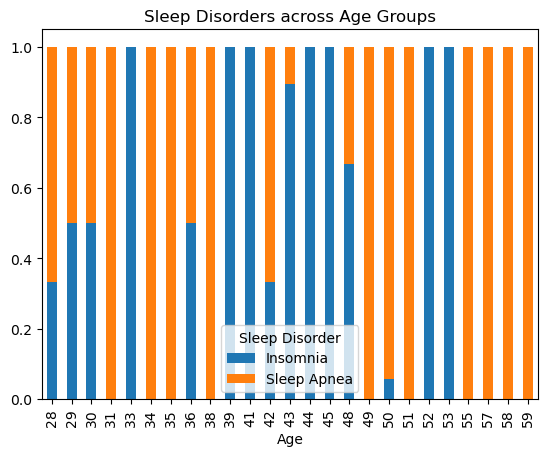

In [31]:
# Scatter plot of age vs sleep duration
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs. Sleep Duration')
plt.show()

# Age and Sleep Disorders Prevalence
age_disorder = df.groupby('Age')['Sleep Disorder'].value_counts(normalize=True).unstack()
age_disorder.plot(kind='bar', stacked=True)
plt.title('Sleep Disorders across Age Groups')
plt.show()


### Conclusion: 
There is no strong linear correlation between age and sleep duration in this scatterplot. However, there is a trend that older individuals (50-60 years) tend to have longer sleep duration compared to younger individuals (30-45 years). The variation in sleep duration is greater in the younger age group, which may be due to differences in lifestyle, occupation, or health factors.

### Implication: 
This suggests that factors beyond age, such as lifestyle and occupation, may play more of a role in determining sleep duration for younger individuals, who tend to have more variable sleep patterns. Meanwhile, older individuals tend to have more consistent sleep patterns, albeit with longer sleep duration, which could be due to physiological changes or different sleep needs.

### Recommendation: 
To help the younger age group (30-45 years old) achieve a more regular sleep pattern, health programs can focus on education about time management, good sleep habits, and the importance of maintaining work-life balance. For older individuals (50-60 years), maintaining good sleep quality remains a priority, with special attention to health factors that may affect their sleep duration and quality


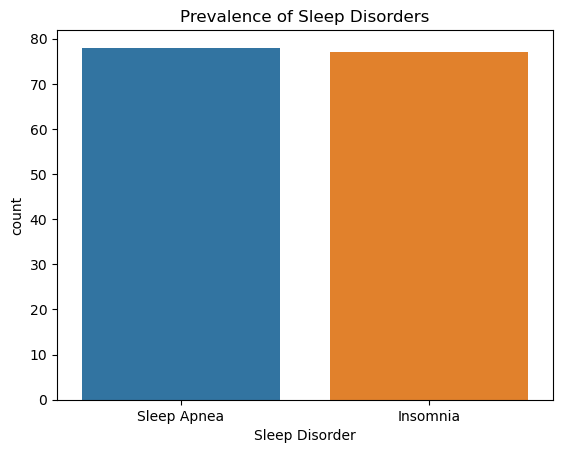

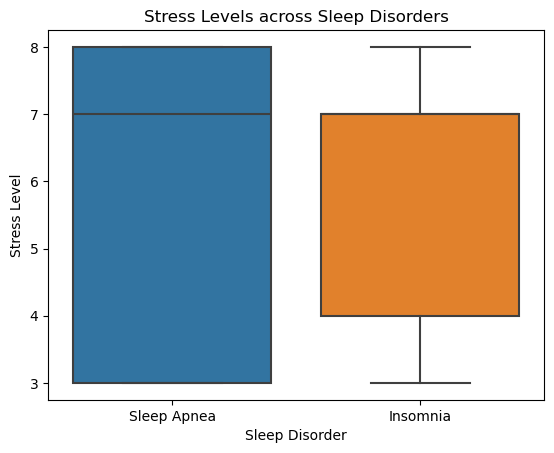

In [32]:
# Countplot of sleep disorders
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Prevalence of Sleep Disorders')
plt.show()

# Relationship between sleep disorders and other variables like stress and physical activity
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Levels across Sleep Disorders')
plt.show()


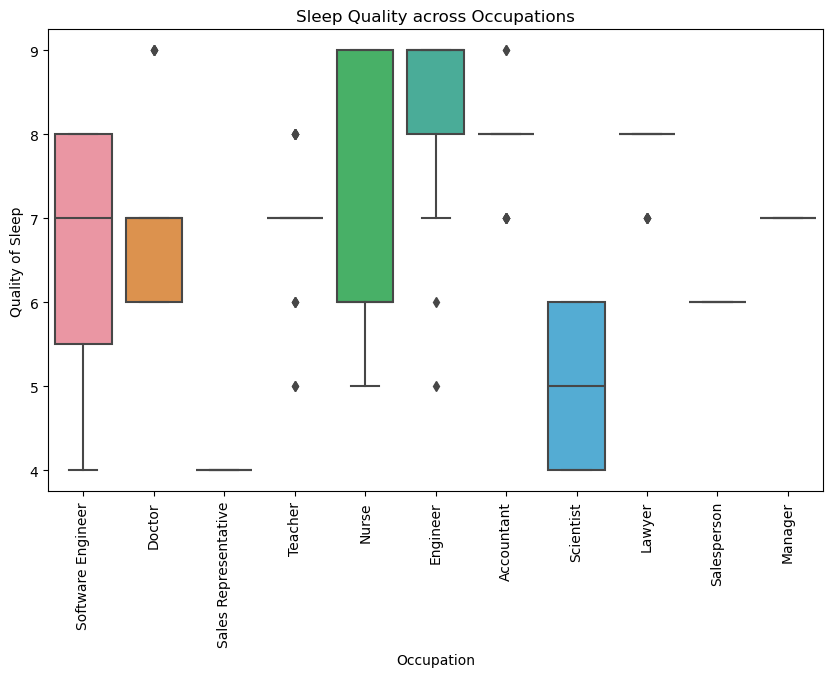

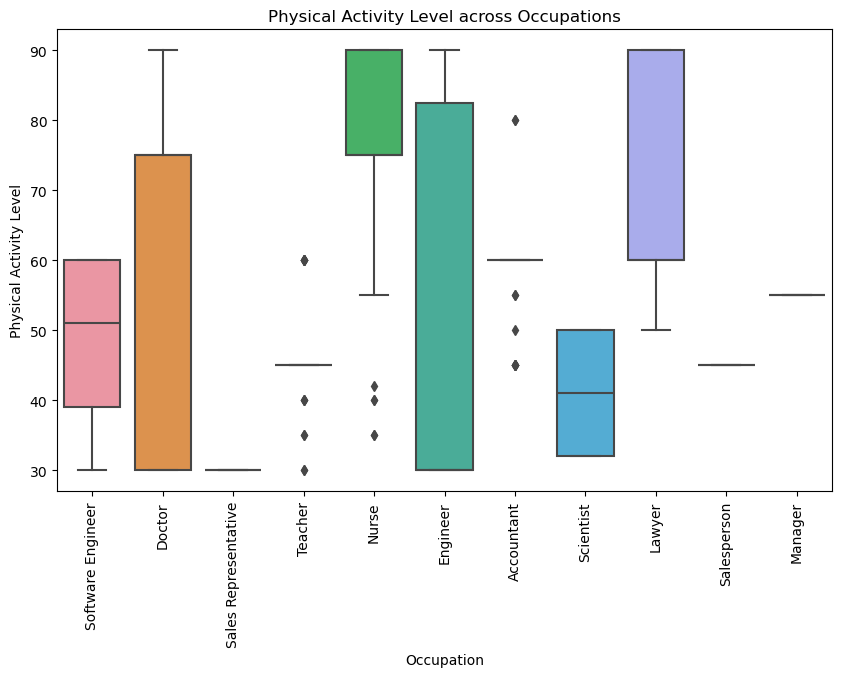

In [33]:
# Boxplot for sleep quality across occupations
plt.figure(figsize=(10,6))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df)
plt.xticks(rotation=90)
plt.title('Sleep Quality across Occupations')
plt.show()

# Boxplot for physical activity across occupations
plt.figure(figsize=(10,6))
sns.boxplot(x='Occupation', y='Physical Activity Level', data=df)
plt.xticks(rotation=90)
plt.title('Physical Activity Level across Occupations')
plt.show()


### Conclusion: 
Engineers have better sleep quality compared to software engineers, possibly because they engage in more physical activities. Engineers' sleep quality is comparable to nurses. On the other hand, scientists rarely engage in physical activity, as seen from the boxplot that shows their physical activity is lower than other professions.

### Implication: 
This suggests that more frequent physical activity by engineers and nurses might contribute to better sleep quality. In contrast, the lack of physical activity in scientists may negatively affect their sleep quality. Professions that involve more mental work without sufficient physical activity, such as software engineers and scientists, could potentially experience poorer sleep quality. 

### Recommendation: 
To improve sleep quality, especially for software engineers and scientists, it is recommended that they engage in more regular physical activity, such as light exercise or walking. Companies or organizations can also provide gym and fitness facilities in the workplace to encourage employees with mental work to stay physically active, which in turn can improve their sleep quality. 


# Exploring Occupation by Age and Gender

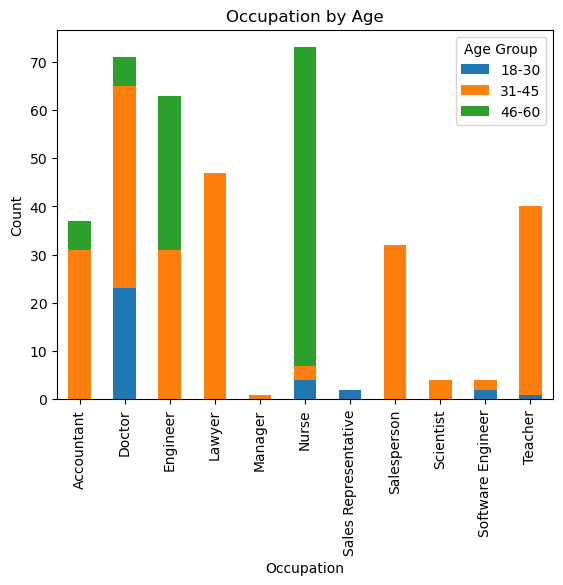

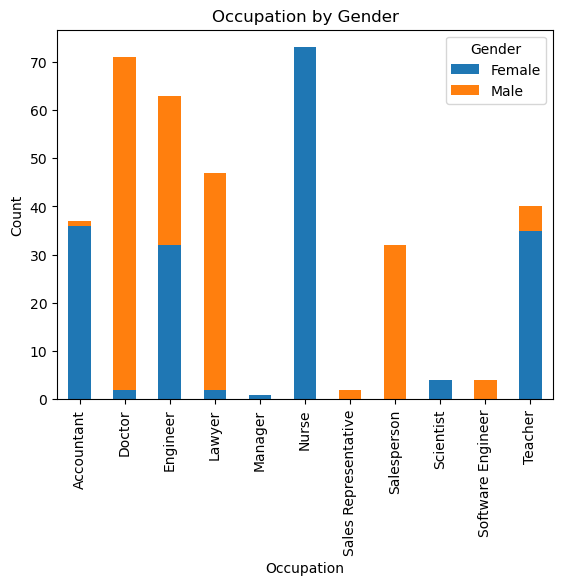

In [34]:
pd.crosstab(df['Occupation'], df['Age Group']).plot(kind='bar', stacked=True)
plt.title('Occupation by Age')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

pd.crosstab(df['Occupation'], df['Gender']).plot(kind='bar', stacked=True)
plt.title('Occupation by Gender')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

## How Occupation Affected Sleep Disorder

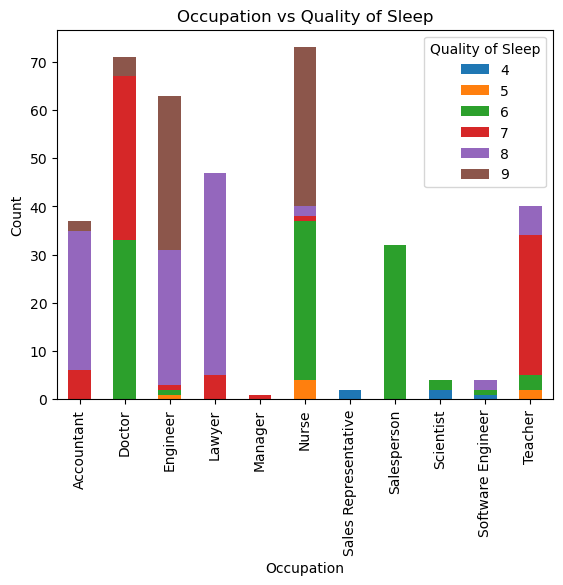

In [35]:
pd.crosstab(df['Occupation'], df['Quality of Sleep']).plot(kind='bar', stacked=True)

plt.title('Occupation vs Quality of Sleep')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


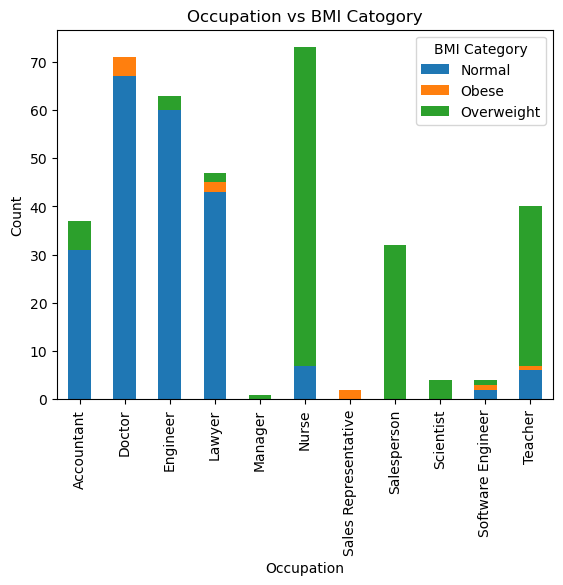

In [36]:
pd.crosstab(df['Occupation'], df['BMI Category']).plot(kind='bar', stacked=True)
plt.title('Occupation vs BMI Catogory')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

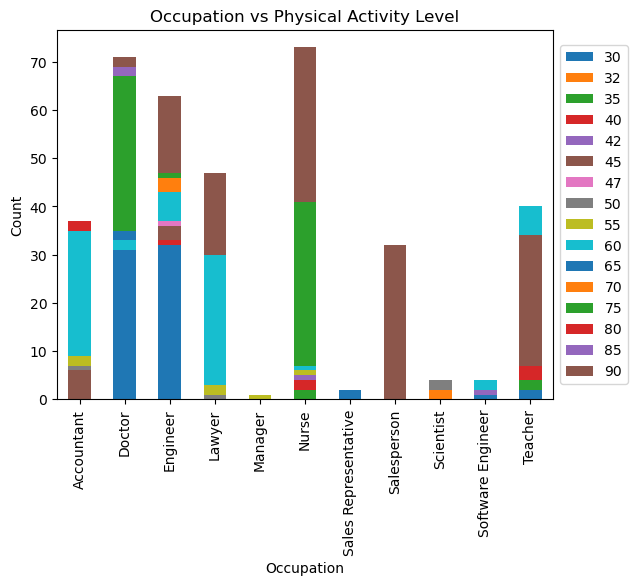

In [37]:
pd.crosstab(df['Occupation'], df['Physical Activity Level']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation vs Physical Activity Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


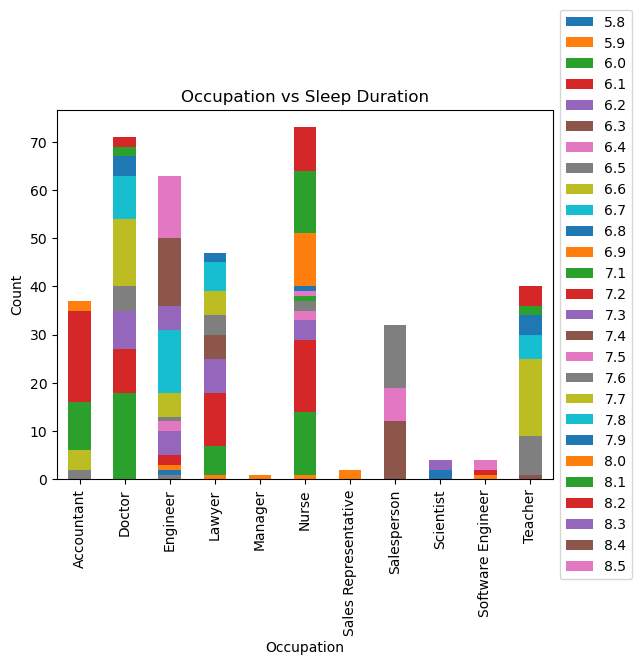

In [38]:
pd.crosstab(df['Occupation'], df['Sleep Duration']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation vs Sleep Duration')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


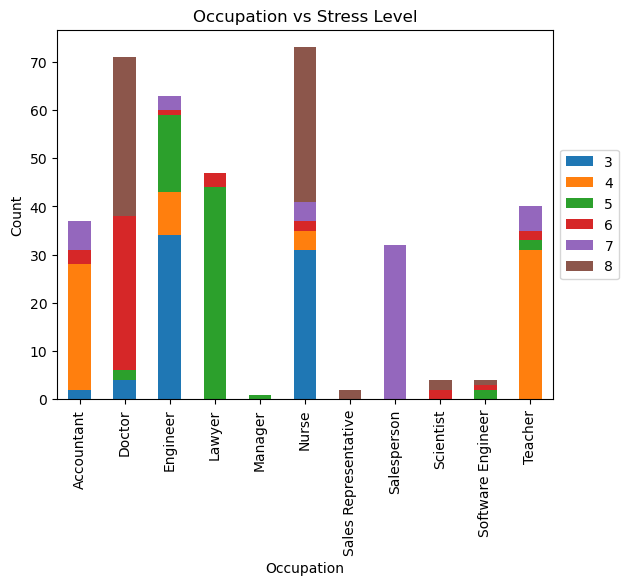

In [39]:
pd.crosstab(df['Occupation'], df['Stress Level']).plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation vs Stress Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


# Preparation Data for Processing

In [40]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [41]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Age Group,Systolic BP,Diastolic BP,BloodPressure_Upper,BloodPressure_Lower
0,1,1,27,9,6.1,6,42,6,2,77,4200,2,0,126,83,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,0,125,80,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,0,125,80,125.0,80.0
3,4,1,28,6,5.9,4,30,8,1,85,3000,1,0,140,90,140.0,90.0
4,5,1,28,6,5.9,4,30,8,1,85,3000,1,0,140,90,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,2,68,7000,1,2,140,95,140.0,95.0
370,371,0,59,5,8.0,9,75,3,2,68,7000,1,2,140,95,140.0,95.0
371,372,0,59,5,8.1,9,75,3,2,68,7000,1,2,140,95,140.0,95.0
372,373,0,59,5,8.1,9,75,3,2,68,7000,1,2,140,95,140.0,95.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


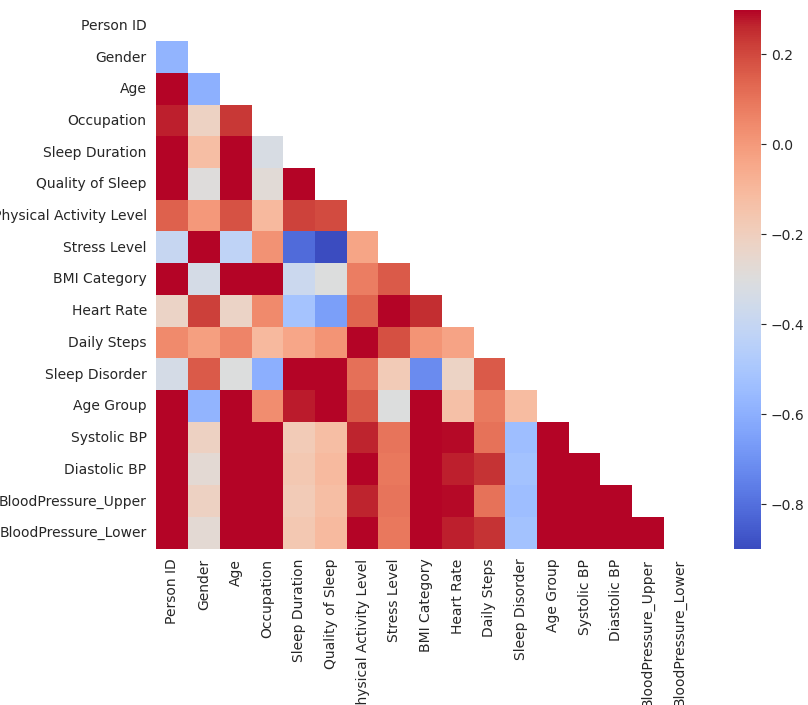

In [42]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = df.corr()
corr_vis(df.corr())

In [43]:
! pip install xgboost

In [44]:
# Prepare data
x = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [45]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
lr_pred = lr.predict(x_test)

In [47]:
lr_report = classification_report(y_test, lr_pred)

print("[ Logistic Regression report ]\n")
print(lr_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.39      0.50      0.44        18
           2       0.62      0.67      0.64        42

    accuracy                           0.59        75
   macro avg       0.67      0.54      0.57        75
weighted avg       0.64      0.59      0.59        75



In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
x_train_scaled = scaler_d.fit_transform(x_train)
x_test_scaled = scaler_d.transform(x_test)

lr_data = LogisticRegression()
rf_data = RandomForestClassifier()
gb_data = GradientBoostingClassifier()
xgb_data = XGBClassifier()

lr_data.fit(x_train_scaled, y_train)
rf_data.fit(x_train_scaled, y_train)
gb_data.fit(x_train_scaled, y_train)
xgb_data.fit(x_train_scaled, y_train)

lr_pred_data = lr_data.predict(x_test_scaled)
rf_pred_data = rf_data.predict(x_test_scaled)
gb_pred_data = gb_data.predict(x_test_scaled)
xgb_pred_data = xgb_data.predict(x_test_scaled)

In [49]:
lr_report = classification_report(y_test, lr_pred_data)

print('[ Logistic Regression]\n')
print(lr_report)

[ Logistic Regression]

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.83      0.86        18
           2       0.93      0.95      0.94        42

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75



In [50]:
rf_report = classification_report(y_test, rf_pred_data)

print('[ Random Forest]\n')
print(rf_report)

[ Random Forest]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.89      0.89      0.89        18
           2       0.93      0.95      0.94        42

    accuracy                           0.92        75
   macro avg       0.92      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75



In [51]:
gb_report = classification_report(y_test, gb_pred_data)

print('[ Gradient Boost ]\n')
print(gb_report)

[ Gradient Boost ]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.83      0.86        18
           2       0.91      0.95      0.93        42

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75



In [52]:
xgb_report = classification_report(y_test, xgb_pred_data)

print('[ XGBoost Classifier ]\n')
print(xgb_report)

[ XGBoost Classifier ]

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       1.00      0.83      0.91        18
           2       0.91      0.98      0.94        42

    accuracy                           0.92        75
   macro avg       0.93      0.89      0.91        75
weighted avg       0.92      0.92      0.92        75



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

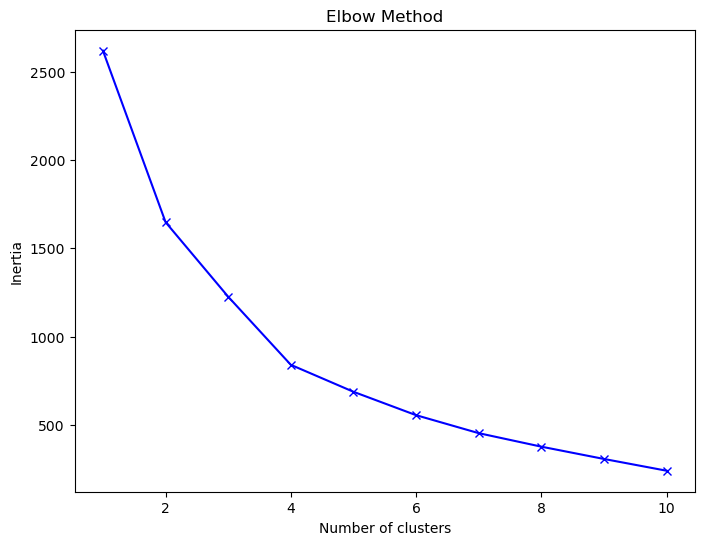

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


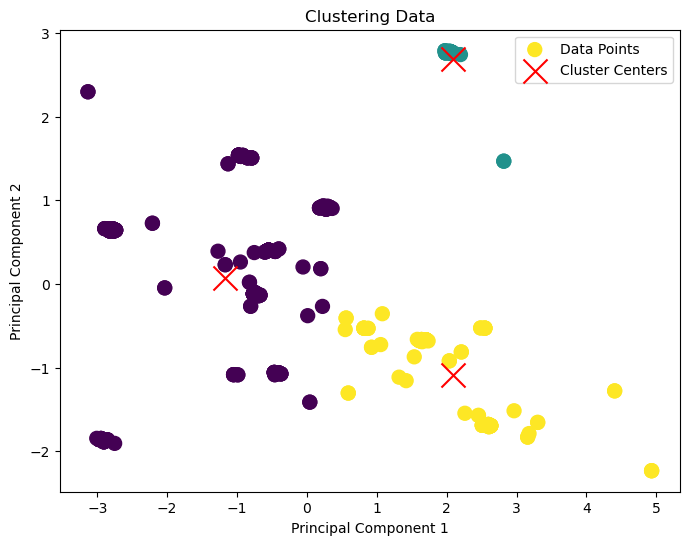

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Mengurangi ke 2 dimensi
feature_scaled = StandardScaler().fit_transform(df[['Age', 'Sleep Duration', 
                                                          'Quality of Sleep', 
                                                          'Stress Level', 
                                                          'Physical Activity Level', 
                                                          'Heart Rate', 
                                                          'Daily Steps']])
pca_features = pca.fit_transform(feature_scaled)

from sklearn.decomposition import PCA

# elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(feature_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, 'bx-') 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# clustering with kmeans
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_scaled) # Reduksi data jadi 2
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(reduced_features)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_kmeans, s=100, cmap='viridis', marker='o',label='Data Points')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='x', label='Cluster Centers')

plt.title('Clustering Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [54]:
pca_components = pd.DataFrame(pca.components_, columns=df.columns[:len(pca.components_[0])])

def top_contributions(pca_components, n=2):
    for i, component in enumerate(pca_components.values):
        sorted_idx = np.argsort(np.abs(component))[-n:]
        print(f"Principal Component {i + 1}:")
        for idx in sorted_idx[::-1]:  
            print(f"  {pca_components.columns[idx]}: {component[idx]:.6f}")

top_contributions(pca_components)


Principal Component 1:
  Age: -0.519330
  Occupation: 0.501988
Principal Component 2:
  Sleep Duration: 0.695260
  Physical Activity Level: 0.684513


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

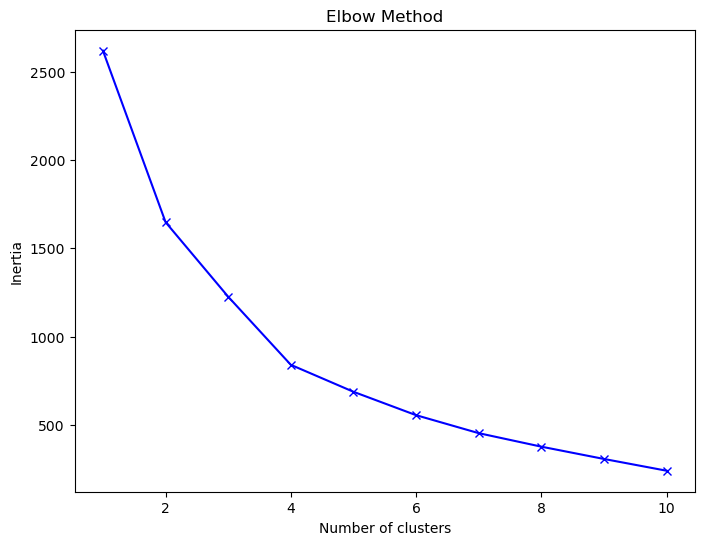

In [55]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(feature_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, 'bx-') 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## Conclusions:
This clustering shows three distinct lifestyle groups based on physical activity and sleep quality. Group 1 (Cluster 0 - marked in yellow) consists of individuals with moderate physical activity and above average sleep quality. Group 2 (Cluster 1 - colored purple) consists of individuals with lower physical activity and sleep quality. Group 3 (Cluster 2 - teal in color) represents a small group with very high physical activity and slightly above average sleep quality.

## Implications:
The results suggest a strong relationship between physical activity levels and sleep quality, with those who are moderately active experiencing better sleep. The outlier group, with the highest activity, also showed improved sleep quality, although not proportionally better than the moderate group. This suggests that there may be a threshold where additional physical activity does not necessarily improve sleep quality.

## Recommendation:
1. Promote a Moderate Physical Activity Program: Given that the moderate group had optimal sleep quality, health initiatives should focus on encouraging regular physical activity, such as walking, cycling or swimming, which can be more sustainable and prevent fatigue.

2. Target for the Low Activity Group: Individuals in the low activity group (Cluster 1) may benefit from programs designed to increase physical activity and sleep, such as guided sleep routines, mindfulness sessions, or short, easy-to-do exercise plans (e.g., walking for 10 minutes daily).

3. Mindfulness and Relaxation Techniques: For the highly active group (Cluster 2), recommendations to combine physical activity with mindfulness practices can help improve overall health, focusing on the balance between activity and relaxation. Stress-reducing interventions such as yoga can further optimize their sleep without adding excessive physical activity.

4. Tailoring the Program Based on Age and Lifestyle: Younger individuals may benefit from more dynamic physical activity (such as sports or team exercises), while older adults may respond better to low-impact exercise paired with sleep hygiene advice.

By implementing these specific, evidence-backed recommendations, you can improve health and lifestyle outcomes by focusing on interventions tailored to the needs of different groups. These measures are not only preventative, but also actionable and measurable in improving physical activity and sleep quality.

## Disuruh Pak Ilham Team Member:
### 1. Eugene Nadya Serafhina Purba
### 2. Ahsan Awadullah Azizan
### 3. Shofi Yulloh Kamil